### 딥러닝

#### 인공신경망

#### Tensorflow
- https://www.tensorflow.org/?hl=ko
- 딥러닝 라이브러리 중 가장 유명
- 구글 브레인팀에서 개발

#### PyTorch
- https://pytorch.org/
- https://pytorch.kr/
- 메타(페이스북)에서 개발한 딥러닝 라이브러리
- GPU 사용이 매우 용이해서 빨리 처리가능

#### MNIST 데이터
- AI에서 많이 사용하는 데이터셋 중 하나
- 미국 국립표준기술연구소에서 배포하는
- 손글씨(0~9), 붓꽃데이터, 패션데이터 등 존재

####

#### Fashion MNIST


In [2]:
# 텐서플로 사용
from tensorflow import keras

In [3]:
# 패션MNIST를 로드하면서 훈련세트와 테스트세트로 분리
# sklearn train_test_split()와 변수 배치가 다름!
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# 60000개 이미지데이터, 가로 28픽셀, 세로 28픽셀
train_input.shape

(60000, 28, 28)

In [ ]:
# 60000개 이미지에 대한 분류값
train_target.shape

(60000,)

#### 이미지 시각화

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
#  한글로 Matplotlib 사용시 항상 필요
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/NanumGothic.ttf' # 나눔고딕코딩 사용, 나눔고딕에서 오류발생(!) font_path = 'C:/Windows/Fonts/NanumGothicCoding.ttf'
font = font_manager.FontProperties(fname=font_path).get_name() # 실제 설치된 폰트 이름조회
rc('font', family=font) # 한글깨짐현상 해결!!
rcParams['axes.unicode_minus'] = False # 한글 사용시 마이너스 표시 깨짐 해결!

sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus': False})

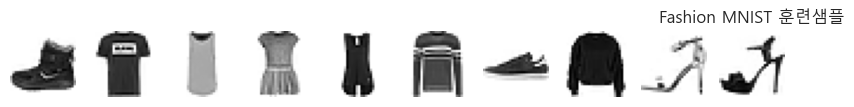

In [22]:
# 10개 차트 그리기
fig, axes = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axes[i].imshow(train_input[i], cmap='gray_r') # cmap = colormap 흑백 1byte, 칼라 4byte
    axes[i].axis('off') # 좌표 끄기
plt.title('Fashion MNIST 훈련샘플')
plt.show()


- 이미지는 픽셀당 흑백은 1byte, 컬러는 3~4byte 사용
- 해상도가 커지면 이미지 파일 사이즈가 기하급수적으로 증가
- 28x28 정도로 제한

In [20]:
# 각 이미지의 분류값
[train_target[i] for i in range(10)]

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]

|레이블|0|1|2|3|4|5|6|7|8|9|
|:---|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|패션MNIST|티셔츠|바지|스웨터|드레스|코트|샌달|셔츠|스니커즈|가방|앵클부츠|

In [23]:
# 60000개 데이터에서 각 레이블별 6000개씩 이미지가 존재
np.unique(train_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

#### 사이킷런 머신러닝, 로지스틱회귀로 아이템 분류

In [27]:
# 사이킷런 모듈 로드
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # 이거 필요 없음

##### 이미지처리
- 28x28 2차원배열을 784 1차원 배열로 변경해줘야 함

<img src="../image/ml0009.png" width="600">

In [30]:
# 2D 이미지를 1D 벡터(1차원 배열)로 펼치기
#train_input.shape
train_input = train_input.reshape(-1, 28*28)

In [31]:
train_input.shape

(60000, 784)

In [32]:
test_input = test_input.reshape(-1, 28*28)

In [33]:
test_input.shape

(10000, 784)

In [36]:
# 스케일링(정규화)
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_input.astype(np.float64)) # 정수로 들어있는 값을 실수로 변경
test_scaled = scaler.transform(test_input.astype(np.float64))

In [37]:
# 로지스틱 회귀 모델
lr = LogisticRegression(C=20, max_iter=1000)
lr

LogisticRegression(C=20, max_iter=1000)

In [38]:
# 훈련
lr.fit(train_scaled, train_target)

c:\Source\iot-dataanalysis-2025\mlvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=20, max_iter=1000)

- 60000건 훈련에 2분 40초 소요됨

In [41]:
lr.score(train_scaled, train_target)
# 88.8% 정확도로 훈련

0.8873

In [ ]:
# 정확도
lr.score(test_scaled, test_target)

0.8305

In [42]:
# 예측
lr.predict(test_scaled)

array([9, 2, 1, ..., 6, 1, 5], dtype=uint8)

In [51]:
pred_result = lr.predict(test_input)      # 분류 확률

In [52]:
# 테스트이미지와 예측결과 시각화
def show_image(index):
    plt.figure(figsize=(2, 2))
    plt.imshow(test_input[index].reshape(28, 28), cmap='gray_r')
    plt.title(f'실제: {test_target[index]}, 예측: {pred_result[index]}')
    plt.axis('off')
    plt.show()

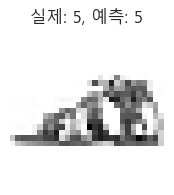

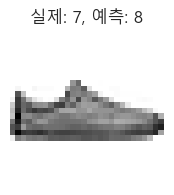

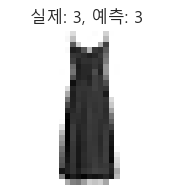

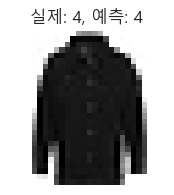

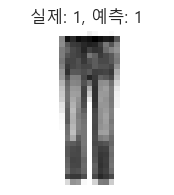

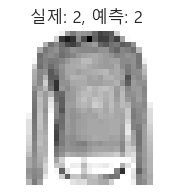

In [54]:
for i in range(11, 17):
    show_image(i)

- 여기까지 머신러닝으로 처리

#### 인공 신경망

- 인간의 뇌속 뉴런과 유사한 구조로 만든 것
- 인공신경망을 이용해서 머신러닝 훈련과 테스트, 예측등을 수행하는 것
- 인공지능 ⊃ 머신러닝 ⊃ 딥러닝(인공신경망 )
- 정확도가 높아서 딥러닝 가장 많이 사용 - 트렌드

<img src="../image/ml0010.png" width="600">

In [55]:
#텐서플로 모듈 로드
import tensorflow as tf
from tensorflow import keras

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
# train_test_split() 함수로 기존 훈련세트를 훈련세트:검증세트 8:2로 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [58]:
train_scaled.shape

(48000, 784)

- 기존 훈련세트 -> 60000
- 새 훈련세트 -> 48000
- 검증세트 -> 12000

- 밀집층(Dense layer)
    - 784vlrtpf(28*28)을 10개(분류된 아이템 개수) 뉴런 연결하면 7840개 연결선이 만들어짐

In [62]:
# 매개변수
## 10 출력값(아이템 0~9)
## activation활성화 함수 : softmax, sigmoid, ReLU ...
## 입력 크기 : 28*28 
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

In [63]:
model = keras.Sequential(dense)

In [64]:
# 훈련전 설정
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [67]:
# 훈련
model.fit(train_scaled, train_target, epochs=2000)

Epoch 1/2000
1500/1500 [==============================] - 1s 877us/step - loss: 0.4158 - accuracy: 0.8654
Epoch 2/2000
1500/1500 [==============================] - 1s 855us/step - loss: 0.4161 - accuracy: 0.8654
Epoch 3/2000
1500/1500 [==============================] - 1s 985us/step - loss: 0.4148 - accuracy: 0.8650
Epoch 4/2000
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4162 - accuracy: 0.8646
Epoch 5/2000
1500/1500 [==============================] - 1s 889us/step - loss: 0.4161 - accuracy: 0.8663
Epoch 6/2000
1500/1500 [==============================] - 1s 852us/step - loss: 0.4140 - accuracy: 0.8673
Epoch 7/2000
1500/1500 [==============================] - 1s 889us/step - loss: 0.4149 - accuracy: 0.8665
Epoch 8/2000
1500/1500 [==============================] - 1s 917us/step - loss: 0.4163 - accuracy: 0.8672
Epoch 9/2000
1500/1500 [==============================] - 1s 922us/step - loss: 0.4141 - accuracy: 0.8660
Epoch 10/2000
1500/1500 [=======================

In [ ]:
model.evaluate(val_scaled, val_target) # epoch = 20

375/375 [==============================] - 0s 805us/step - loss: 0.5389 - accuracy: 0.8412


[0.5389169454574585, 0.8411666750907898]

In [ ]:
# 검증
model.evaluate(val_scaled, val_target) # epoch = 2000

375/375 [==============================] - 0s 799us/step - loss: 1.3398 - accuracy: 0.8268


[1.3397921323776245, 0.8268333077430725]

|레이블|0|1|2|3|4|5|6|7|8|9|
|:---|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|패션MNIST|티셔츠|바지|스웨터|드레스|코트|샌달|셔츠|스니커즈|가방|앵클부츠|

#### 결론
- `딥러닝` : 인공신경망. 생물학적 뉴런에서 영감을 받아 만든 머신러닝 알고리즘
    - 이미지, 음성, 텍스트, 영상 분야에 뛰어난 성능 발휘
- `밀집층` : Dense Layer. 가장 간단한 인공신경망
- `원-핫 인코딩` : 해당 요소만 1로 나머지는 0으로 변환하는 방식
    - [1, 0, 0, 0, 0, 0, 0, 0, 0, 0] - 티셔츠
    - [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] - 스니커즈